## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [14]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Data Load

In [15]:
# 데이터 로드
IVF_train = pd.read_csv('../data/IVF_train_dataset_27.csv')
IVF_test = pd.read_csv('../data/IVF_test_dataset_27.csv')

DI_train = pd.read_csv('../data/DI_train_dataset_27.csv')
DI_test = pd.read_csv('../data/DI_test_dataset_27.csv')

In [16]:
# ID 열을 제외한 특성과 타겟 변수 분리
IVF_X = IVF_train.drop(['임신_성공_여부', 'ID'], axis=1)
IVF_y = IVF_train['임신_성공_여부']

DI_X = DI_train.drop(['임신_성공_여부', 'ID'], axis=1)
DI_y = DI_train['임신_성공_여부']

In [17]:
print(f"IVF_X shape: {IVF_X.shape}")
print(f"IVF_test shape: {IVF_test.drop('ID', axis=1).shape}")
print(f"DI_X shape: {DI_X.shape}")
print(f"DI_test shape: {DI_test.drop('ID', axis=1).shape}")

IVF_X shape: (250052, 85)
IVF_test shape: (87891, 85)
DI_X shape: (6289, 36)
DI_test shape: (2176, 36)


### 인코딩 

In [18]:
IVF_categorical_columns = [
    "시술_시기_코드",
    "시술_당시_나이",
    "특정_시술_유형",
    "배란_유도_유형",
    "난자_출처",
    "정자_출처",
    "난자_기증자_나이",
    "정자_기증자_나이"
]

In [19]:
DI_categorical_columns = [
    "시술_시기_코드",
    "시술_당시_나이",
    "특정_시술_유형",
    "정자_기증자_나이"
]

In [20]:
# 모든 범주형 변수를 문자열로 변환
IVF_X[IVF_categorical_columns] = IVF_X[IVF_categorical_columns].astype(str)
DI_X[DI_categorical_columns] = DI_X[DI_categorical_columns].astype(str)
IVF_test[IVF_categorical_columns] = IVF_test[IVF_categorical_columns].astype(str)
DI_test[DI_categorical_columns] = DI_test[DI_categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
IVF_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
DI_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

IVF_X[IVF_categorical_columns] = IVF_encoder.fit_transform(IVF_X[IVF_categorical_columns])
DI_X[DI_categorical_columns] = DI_encoder.fit_transform(DI_X[DI_categorical_columns])
IVF_test[IVF_categorical_columns] = IVF_encoder.transform(IVF_test[IVF_categorical_columns])
DI_test[DI_categorical_columns] = DI_encoder.transform(DI_test[DI_categorical_columns])

## Modeling

In [21]:
# 데이터 분할
IVF_X_train, IVF_X_test, IVF_y_train, IVF_y_test = train_test_split(IVF_X, IVF_y, test_size=0.2, random_state=42)
DI_X_train, DI_X_test, DI_y_train, DI_y_test = train_test_split(DI_X, DI_y, test_size=0.2, random_state=42)

### IVF 데이터


--- Model Performance ---
Model Accuracy: 0.7458959029013617
Model F1 Score: 0.17811408614668217
Model AUC: 0.7399506347880511


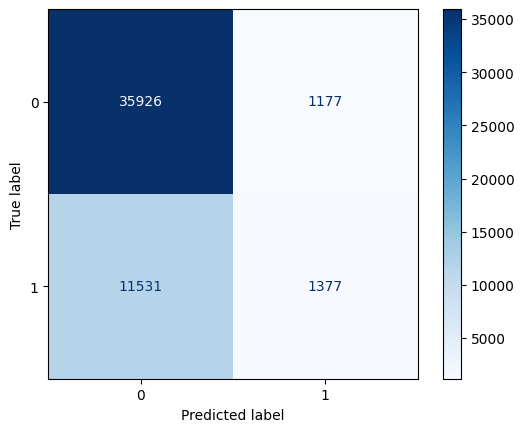

In [22]:
# 모델 초기화
IVF_model = lgb.LGBMClassifier(
    n_estimators=3131,
    max_depth=272,
    learning_rate=0.007735187574021875,
    num_leaves=9,
    min_child_samples=60,
    subsample=0.6282471502055968,
    reg_alpha=0.0016787067539290289,
    reg_lambda=0.16134555335641168,
    random_state=42,
    boosting_type='gbdt',
    verbose=-1
)

# 모델 학습
IVF_model.fit(IVF_X_train, IVF_y_train)

# 예측
y_pred = IVF_model.predict(IVF_X_test)
y_pred_proba = IVF_model.predict_proba(IVF_X_test)[:, 1]

# 평가
accuracy = accuracy_score(IVF_y_test, y_pred)
f1 = f1_score(IVF_y_test, y_pred)
auc = roc_auc_score(IVF_y_test, y_pred_proba)
cm = confusion_matrix(IVF_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=IVF_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### DI 데이터


--- Model Performance ---
Model Accuracy: 0.8736089030206677
Model F1 Score: 0.012422360248447206
Model AUC: 0.7246067036356666


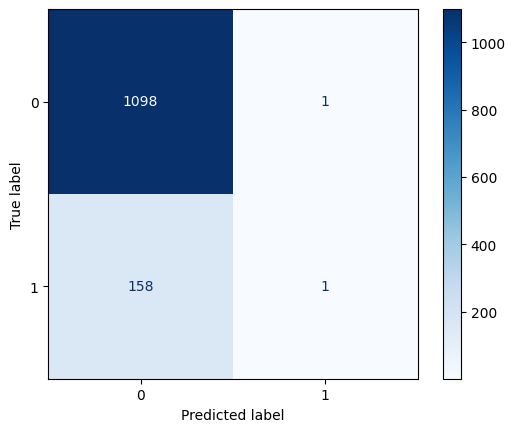

In [23]:
# 모델 초기화
DI_model = lgb.LGBMClassifier(
    n_estimators=4604,
    max_depth=276,
    learning_rate=0.09268921690273974,
    num_leaves=2,
    min_child_samples=70,
    subsample=0.603490858727672,
    reg_alpha=0.010665492916529533,
    reg_lambda=0.0022411835420855,
    random_state=42,
    boosting_type='gbdt',
    verbose=-1
)

# 모델 학습
DI_model.fit(DI_X_train, DI_y_train)

# 예측
y_pred = DI_model.predict(DI_X_test)
y_pred_proba = DI_model.predict_proba(DI_X_test)[:, 1]

# 평가
accuracy = accuracy_score(DI_y_test, y_pred)
f1 = f1_score(DI_y_test, y_pred)
auc = roc_auc_score(DI_y_test, y_pred_proba)
cm = confusion_matrix(DI_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DI_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


--- Model Performance ---
Model Accuracy: 0.7490296280403362
Model F1 Score: 0.1764065800422454
Model AUC: 0.741976729638163


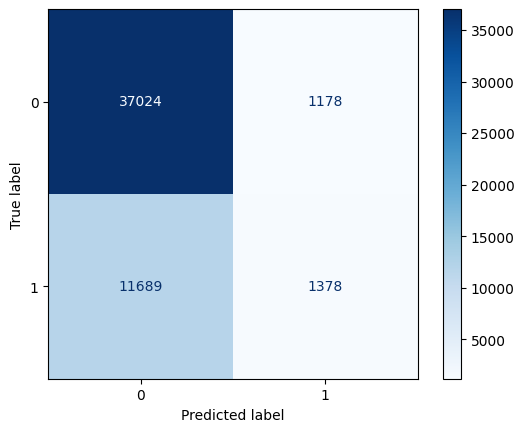

In [24]:
# 예측
IVF_y_pred = IVF_model.predict(IVF_X_test)
IVF_y_pred_proba = IVF_model.predict_proba(IVF_X_test)[:, 1]

DI_y_pred = DI_model.predict(DI_X_test)
DI_y_pred_proba = DI_model.predict_proba(DI_X_test)[:, 1]

# 예측 결과 병합
y_test = pd.concat([IVF_y_test, DI_y_test])
y_pred = pd.concat([pd.Series(IVF_y_pred, index=IVF_y_test.index), pd.Series(DI_y_pred, index=DI_y_test.index)])
y_pred_proba = pd.concat([pd.Series(IVF_y_pred_proba, index=IVF_y_test.index), pd.Series(DI_y_pred_proba, index=DI_y_test.index)])

# 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=IVF_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

데이콘 PUBLIC ??

## 제출

In [12]:
# 모델 학습 및 예측
IVF_model.fit(IVF_X, IVF_y)
IVF_pred_proba = IVF_model.predict_proba(IVF_test.drop('ID', axis=1))[:, 1]

DI_model.fit(DI_X, DI_y)
DI_pred_proba = DI_model.predict_proba(DI_test.drop('ID', axis=1))[:, 1]

In [13]:
# 예측 결과 병합
IVF_test['probability'] = IVF_pred_proba
DI_test['probability'] = DI_pred_proba

# 최종 제출 파일 생성
submission = pd.concat([IVF_test[['ID', 'probability']], DI_test[['ID', 'probability']]], axis=0)
submission = submission.sort_values(by='ID')  

# 제출 파일 저장
submission.to_csv('../submission/code27_submit_7372.csv', index=False, encoding='utf-8')

---

In [4]:
import pandas as pd

# 두 CSV 파일을 읽어옵니다.
df1 = pd.read_csv('../submission/code26_submit.csv')
df2 = pd.read_csv('../submission/code26_submit_xgb.csv')

# ID를 기준으로 병합합니다.
merged_df = pd.merge(df1, df2, on='ID', suffixes=('_df1', '_df2'))

# 'probability' 열을 소프트 보팅하여 새로운 'probability' 열 생성
merged_df['probability'] = (merged_df['probability_df1'] + merged_df['probability_df2']) / 2

# 최종 제출 파일 생성
submission = merged_df[['ID', 'probability']]
submission = submission.sort_values(by='ID')

# 제출 파일 저장
submission.to_csv('../submission/code26_soft_voting_submit_LgbmXgb.csv', index=False, encoding='utf-8')

데이콘 PUBLIC 0.741867513	

In [6]:
import pandas as pd

# 두 CSV 파일을 읽어옵니다.
df1 = pd.read_csv('../submission/code26_submit.csv')
df2 = pd.read_csv('../submission/code26_submit_xgb.csv')

# ID를 기준으로 병합합니다.
merged_df = pd.merge(df1, df2, on='ID', suffixes=('_df1', '_df2'))

# 'probability' 열을 조건에 따라 선택하여 새로운 'probability' 열 생성
def select_probability(row):
    if row['probability_df1'] > 0.35 and row['probability_df2'] > 0.35:
        return max(row['probability_df1'], row['probability_df2'])
    elif row['probability_df1'] < 0.25 and row['probability_df2'] < 0.25:
        return min(row['probability_df1'], row['probability_df2'])
    else:
        return row['probability_df1']

merged_df['probability'] = merged_df.apply(select_probability, axis=1)

# 최종 제출 파일 생성
submission = merged_df[['ID', 'probability']]
submission = submission.sort_values(by='ID')

# 제출 파일 저장
submission.to_csv('../submission/code26_voting_upgrad_submit_LgbmXgb.csv', index=False, encoding='utf-8')

데이콘 PUBLIC 0.7419275123

In [5]:
import pandas as pd

# 세 CSV 파일을 읽어옵니다.
df1 = pd.read_csv('../submission/code26_submit.csv')
df2 = pd.read_csv('../submission/code26_submit_xgb.csv')
df3 = pd.read_csv('../submission/code26_submit_cat.csv')

# ID를 기준으로 병합합니다.
merged_df = pd.merge(df1, df2, on='ID', suffixes=('_df1', '_df2'))
merged_df = pd.merge(merged_df, df3, on='ID')

# 'probability' 열을 소프트 보팅하여 새로운 'probability' 열 생성
merged_df['probability'] = (merged_df['probability_df1'] + merged_df['probability_df2'] + merged_df['probability']) / 3

# 최종 제출 파일 생성
submission = merged_df[['ID', 'probability']]
submission = submission.sort_values(by='ID')

# 제출 파일 저장
submission.to_csv('../submission/code26_soft_voting_submit_LgbmXgbCat.csv', index=False, encoding='utf-8')

데이콘 PUBLIC 0.740968999

In [1]:
import pandas as pd

# 세 CSV 파일을 읽어옵니다.
df1 = pd.read_csv('../submission/code26_submit.csv')
df2 = pd.read_csv('../submission/code26_submit_xgb.csv')
df3 = pd.read_csv('../submission/code26_submit_cat.csv')

# ID를 기준으로 병합합니다.
merged_df = pd.merge(df1, df2, on='ID', suffixes=('_df1', '_df2'))
merged_df = pd.merge(merged_df, df3, on='ID')

# 'probability' 열을 조건에 따라 선택하여 새로운 'probability' 열 생성
def select_probability(row):
    if row['probability_df1'] > 0.35 and row['probability_df2'] > 0.35:
        if row['probability'] > 0.35:
            return max(row['probability_df1'], row['probability_df2'], row['probability'])
        else:
            return max(row['probability_df1'], row['probability_df2'])
    elif row['probability_df1'] < 0.25 and row['probability_df2'] < 0.25:
        if row['probability'] < 0.25:
            return min(row['probability_df1'], row['probability_df2'], row['probability'])
        else:
            return min(row['probability_df1'], row['probability_df2'])
    else:
        return row['probability_df1']

merged_df['probability'] = merged_df.apply(select_probability, axis=1)

# 최종 제출 파일 생성
submission = merged_df[['ID', 'probability']]
submission = submission.sort_values(by='ID')

# 제출 파일 저장
submission.to_csv('../submission/code26_voting_upgrad_submit_LgbmXgbCat.csv', index=False, encoding='utf-8')

데이콘 PUBLIC 0.7404372168

In [5]:
import pandas as pd

# 두 CSV 파일을 읽어옵니다.
df1 = pd.read_csv('../submission/code26_voting_upgrad_submit_LgbmXgb.csv')
df2 = pd.read_csv('../submission/code26_voting_upgrad_submit_LgbmXgbCat.csv')

# ID를 기준으로 병합하여 값이 다른 행을 찾습니다.
merged_df = pd.merge(df1, df2, on='ID', suffixes=('_df1', '_df2'))

# 'probability' 열의 값이 다른 행을 필터링합니다.
different_rows = merged_df[merged_df['probability_df1'] != merged_df['probability_df2']]

In [9]:
different_rows.tail(3)

,ID,probability_df1,probability_df2
90063,TEST_90063,0.300819,0.306604
90064,TEST_90064,0.520521,0.524196
90066,TEST_90066,0.001120,0.001123


.